In [ ]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

*italicized text*# Scaling

Several Machine Learning models use distances at some point during their optimization process. When distances are computed, the scale of a variable has a great impact. Therefore, if you have variables with a higher scale than others this can make your model focus more on these variables than on those with lower scale, even if the latter can be more informative regarding the target.

For this reason, usually variables on the dataset are scaled in some manner. The most popular choice is to scale to zero mean and standard deviation 1 (tipify).

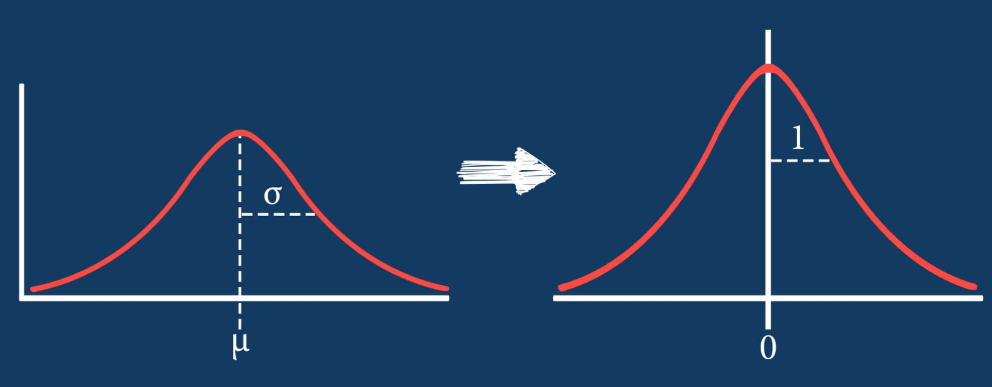

## Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving userbase.csv to userbase.csv


In [ ]:
import io
dat = pd.read_csv(io.BytesIO(uploaded['userbase.csv']), sep = ";")
dat = dat[['price']] # Let's keep only numerical columns for this notebook
dat.head()

,price
0,58.200001
1,147.500000
2,24.049999
3,59.709999
4,37.299999


### Standard Scaling (mean = 0 & sd = 1)

In [ ]:
from sklearn.preprocessing import scale
?scale

In [1]:
dat_scale = pd.DataFrame(scale(dat))
dat_scale.columns = dat.columns

NameError: ignored

In [ ]:
dat

,price
0,58.200001
1,147.500000
2,24.049999
3,59.709999
4,37.299999
...,...
995,99.849998
996,34.610001
997,49.880001
998,152.960007


In [ ]:
dat_scale

,price
0,-0.321352
1,0.905409
2,-0.790488
3,-0.300608
4,-0.608466
...,...
995,0.250816
996,-0.645420
997,-0.435648
998,0.980416


Let's check mean and standard deviation values before and after scaling.

In [ ]:
dat.apply([np.mean, np.std])

,price
mean,81.592262
std,72.830252


In [ ]:
dat_scale.apply([np.mean, np.std])

,price
mean,1.567374e-16
std,1.000507e+00


### min-max (0-1 range)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
?MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(dat) # This should be dat_train
dat_scaled = pd.DataFrame(scaler.transform(dat))
dat_scaled.columns = dat.columns

In [ ]:
dat

,price
0,58.200001
1,147.500000
2,24.049999
3,59.709999
4,37.299999
...,...
995,99.849998
996,34.610001
997,49.880001
998,152.960007


In [ ]:
dat_scaled

,price
0,0.081397
1,0.206291
2,0.033636
3,0.083509
4,0.052167
...,...
995,0.139648
996,0.048405
997,0.069761
998,0.213927


Let's check min and max values before and after scaling.

In [ ]:
dat.apply([np.min, np.max])

,price
amin,0.00000
amax,715.01001


In [ ]:
dat_scaled.apply([np.min, np.max])

,price
amin,0.0
amax,1.0


Let's check mean and standard deviation values before and after scaling.

In [ ]:
dat.apply([np.mean, np.std])

,price
mean,81.592262
std,72.830252


In [ ]:
dat_scaled.apply([np.mean, np.std])

,price
mean,0.114113
std,0.101859


## Define Custom Function

In [ ]:
def scale_fun(dat, numerical_variables, method = 'standard'):
    dat_scaled = dat.copy()
    if method == 'standard':
      dat_scaled[numerical_variables] = pd.DataFrame(scale(dat[numerical_variables]))
    elif method == 'min-max':
      scaler = MinMaxScaler()
      scaler.fit(dat[numerical_variables]) # This should be dat_train
      dat_scaled[numerical_variables] = pd.DataFrame(scaler.transform(dat[numerical_variables]))
    return dat_scaled

In [ ]:
numerical_variables = ['price']
dat_scaled = scale_fun(dat, numerical_variables = numerical_variables, method = 'standard')
dat_scaled[numerical_variables].apply([np.min, np.max, np.mean, np.std])

,price
amin,-1.120876e+00
amax,8.701593e+00
mean,1.567374e-16
std,1.000507e+00


In [ ]:
dat_scaled = scale_fun(dat, numerical_variables = numerical_variables, method = 'min-max')
dat_scaled[numerical_variables].apply([np.min, np.max, np.mean, np.std])

,price
amin,0.000000
amax,1.000000
mean,0.114113
std,0.101859
